In [189]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [190]:
style.use('ggplot')
tickers = ['TSLA', 'BAC']
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2020, 11, 20)
returns = pd.DataFrame() # create an empty data frame, returns.
returns

""


# Portfolio Optimization:
Optimal portfolio has the highest sharpe ratio
- [**Data**](#Data): Extract the data online and organize it in the data frame.


## Data

In [191]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
data

# Loop will run for the first time for TSLA, extracts the data from yahoo finance and store it in data 
#frame, data. The loop will then run for BAC, extracts the data from yahoo finance and replace the data
# in data frame, data. This is not the dataframe that we want at the end since it will contain data of
# only BAC, the last ticker in the tickers list.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512722
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972696
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241734
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458702
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319847
...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760632
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453


In [192]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data[ticker] = data['Adj Close'].pct_change() # add a column to data frame, data, and store returns in it.

# pd.set_option('display.max_rows', None)
data
# still same number of rows as above, so values of one firm (TSLA) replace by another firm (BAC).

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512728,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972698,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241733,0.019254
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458705,0.015235
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319844,-0.009604
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760632,0.021482
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178455,-0.020690


In [193]:
13.972697 / 13.512726 - 1

# just for confirmation of the return above.

0.034039837705582165

In [194]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
data
# loop first running for TSLA, extracting its data from yahoo finance from the start to the end dates 
# and then storing it in a data frame, data. Next, data[ticker] = data[TSLA] column is created which
# contains percentage changes in the Adj Close of TSLA. Next, if-else is evaluated. In the if statement,
# returns.empty outputs True since the data frame, returns, is yet empty, which sets the data frame,
# returns, equal to data[[ticker]] or more precisely to data[[TSLA]]. This finishes the first loop.

# Then the loop runs for BAC, extracting its data from yahoo finance from the start to the end dates
# and then storing it in a data frame, data. Next, data[ticker] = data[BAC] column is created which
# is set equal to percentage changes in the Adj Close of BAC. Next, if-else is evaluated. In the if
# statement,returns.empty turns out to be False this time, therefore, else is executed, where the data 
# frame, returns which already contains the data for TSLA, now takes the data from data[[ticker]] which
# is this time equal to data[[BAC]]. Thus, the data frame, returns, now contains two columns. The first one
# contains percent changes (net returns) of TSLA and the second one contains the percent changes (net returns) of
# BAC.

# The data frame, data, will still contain 1,737 rows since it contains data only for BAC.

# The data frame, returns, will contain 1,737 rows but then two columns, one for TSLA and the other for
# BAC.

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512726,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972697,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241735,0.019255
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458702,0.015235
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319849,-0.009603
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630,0.021481
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178455,-0.020690


In [195]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [196]:
type(returns)

pandas.core.frame.DataFrame

In [197]:
len(tickers)

2

## Determine the portfolio weights:

In [198]:
for i in range(10):
    weights = np.random.rand(len(tickers))
    print(weights)
    
# Loop will run the first time for 0 and put 0 in portfolio variable. Then, np.random.random_sample(2) will run
# and produce two random numbers and store them in the variable, weights. The loop then runs for 1 in portfolio
# variable, np.random.random_sample(2) generates two random numbers and store them in the variable, weights again.
# The loop runs 5 times in total from 0 to 4. Thus, the variable, weights, contain 5 sets of 2 random numbers and
# each set can be viewed as a seperate portfolio. Hence, the total number of portfolios is equal to 5.

# But now the problem is each portfolio weight is either less than or greater than 1 or 100 percent. We overcome 
# this problem in the following as:

[0.27960677 0.99268242]
[0.55630228 0.1492471 ]
[0.54921433 0.13037391]
[0.43738573 0.92327661]
[0.78915589 0.33028886]
[0.11329097 0.50341696]
[0.1252243  0.06845049]
[0.01481791 0.842281  ]
[0.67023047 0.82436216]
[0.58739927 0.8460302 ]


In [199]:
weights

array([0.58739927, 0.8460302 ])

In [200]:
weights[0] + weights[1] # these will change every time we run the cells above.

1.4334294739746345

In [202]:
weights = weights / np.sum(weights)

In [203]:
weights[0] + weights[1] # Now the sum of the weights invested in both the assets is precesiely equal to 1.

0.9999999999999999

In [204]:
weights = 0 # to start fresh for the following loop.
weights

0

In [205]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.rand(len(tickers))
    weights = weights / np.sum(weights)
    print(weights)
    
# Now the weights invested in each portfolio is equal to 1.

[0.49162487 0.50837513]
[0.27243034 0.72756966]
[0.74853136 0.25146864]
[0.91423616 0.08576384]
[0.75868297 0.24131703]


In [206]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [207]:
weights = 0 # to start fresh for the following loop.
weights

0

In [208]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)

print(portfolio_weights)

[array([0.902, 0.098]), array([0.556, 0.444]), array([0.508, 0.492]), array([0.299, 0.701]), array([0.141, 0.859])]


## Compute Annualized Portfolio Returns:

In [209]:
returns # the data frame, returns, contains daily returns of the 2 stocks.

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [210]:
returns.mean() 
# generates daily mean return for the two stocks. TSLA on average generates a daily return of $0.0022 per dollar
# investment or $0.22 per 100 dollar investment.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [211]:
weights # the weights of both the assets in a portfolio.

array([0.141, 0.859])

In [212]:
weights[0], weights[1]

(0.141, 0.859)

In [213]:
0.002186 * weights[0] + 0.000582 * weights[1] 
# Portfolio of these weights generate daily expected return of $0.0014 per dollar investment or return of $0.14 
# per 100 dollar investment.

0.000808164

In [214]:
np.sum(returns.mean() * weights) 

# generates the portfolio's daily expected return given the means and weights. We cannot change the mean daily 
# returns but can change the weights, which will change the portfolio's expected return.

# Investing 52.7% of the total available funds in TSLA and 47.3% in BAC has the expected daily portfolio return of
# $0.00143 per dollar of investment or $0.143 per 100 dollars of investment. 

0.0008079533864349974

In [219]:
np.sum(returns.mean() * weights) * 252 
# 252 days since stock markets usally trade for 252 days in a year.
# generates annualized return of the portfolio. So, $1 invested in this portfolio is expected to generate a return
# of almost $0.25 in a year or $100 invested in this portfolio is expected to generate a return of almost $25 in a
# year.

0.0

In [216]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights

([],
 [],
 [],
 [array([0.902, 0.098]),
  array([0.556, 0.444]),
  array([0.508, 0.492]),
  array([0.299, 0.701]),
  array([0.141, 0.859])],
 0,
 array([0.141, 0.859]))

In [217]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [218]:
weights = 0

In [93]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    annualized_return = np.round((annualized_return), 3)
    portfolio_return.append(annualized_return)

print(portfolio_weights)
print(portfolio_return)

[array([0.006, 0.994]), array([0.946, 0.054]), array([0.326, 0.674]), array([0.486, 0.514]), array([0.338, 0.662])]
[0.149, 0.529, 0.278, 0.343, 0.283]


## Compute Covariance Matrix and Portfolio's Risk:

In [220]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [95]:
returns.cov()

,TSLA,BAC
TSLA,0.001160,0.000187
BAC,0.000187,0.000410


In [96]:
returns.cov() * 252

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [97]:
covariance_matrix = returns.cov() * 252
covariance_matrix

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [98]:
weights

array([0.338, 0.662])

In [99]:
weights.T # step A in excel.

array([0.338, 0.662])

In [100]:
np.dot(covariance_matrix, weights) # step B in excel.

array([0.13003192, 0.084261  ])

In [101]:
np.dot(weights.T, np.dot(covariance_matrix, weights)) # step C in excel.

0.09973157421814088

In [102]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_variance

0.09973157421814088

In [103]:
standard_deviation = np.sqrt(portfolio_variance)
standard_deviation

0.3158030623951276

In [104]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.149, 0.529, 0.278, 0.343, 0.283],
 [],
 [],
 [array([0.006, 0.994]),
  array([0.946, 0.054]),
  array([0.326, 0.674]),
  array([0.486, 0.514]),
  array([0.338, 0.662])],
 array([0.338, 0.662]),
 0.283,
 0)

In [221]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [222]:
weights = 0
annualized_return = 0

In [223]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)

[array([0.422, 0.578]), array([0.85, 0.15]), array([0.531, 0.469]), array([0.58, 0.42]), array([0.65, 0.35])]
[0.31718901199723976, 0.49019355536907433, 0.36124858028586115, 0.3810551752045992, 0.4093503108027965]
[0.3309792039086458, 0.4749651810302254, 0.35864083060727947, 0.3735392488455025, 0.3970200776653474]


## Compute Sharpe Ratio

In [108]:
annualized_return # the portfolio's expected annual return.

0.5039369097904224

In [109]:
rf

0

In [110]:
annualized_return - rf

0.5039369097904224

In [111]:
portfolio_standard_deviation

0.48943198638086344

In [112]:
shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [113]:
shrp_ratio
# risk premium per unit of risk. The higher the shrp ratio is, the better it is.

1.029636239177616

In [114]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.3030414592329215,
  0.454622533597233,
  0.3236564853464678,
  0.38590577988541175,
  0.5039369097904224],
 [0.32394537989111755,
  0.4389949733905222,
  0.33451311324341576,
  0.37739048942095343,
  0.48943198638086344],
 [],
 [array([0.387, 0.613]),
  array([0.762, 0.238]),
  array([0.438, 0.562]),
  array([0.592, 0.408]),
  array([0.884, 0.116])],
 array([0.884, 0.116]),
 0.5039369097904224,
 0)

In [115]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [116]:
weights = 0
annualized_return = 0

In [117]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.rand(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

    print(portfolio_weights)
    print(portfolio_return)
    print(portfolio_risk)
    print(sharpe_ratio)

[array([0.339, 0.661])]
[0.28363908171428953]
[0.3159484410173922]
[0.8977385069568229]
[array([0.339, 0.661]), array([0.62, 0.38])]
[0.28363908171428953, 0.397223833437947]
[0.3159484410173922, 0.38666401579867743]
[0.8977385069568229, 1.0273100604343997]
[array([0.339, 0.661]), array([0.62, 0.38]), array([0.508, 0.492])]
[0.28363908171428953, 0.397223833437947, 0.35195161922780593]
[0.3159484410173922, 0.38666401579867743, 0.35213920888803557]
[0.8977385069568229, 1.0273100604343997, 0.9994672855067119]
[array([0.339, 0.661]), array([0.62, 0.38]), array([0.508, 0.492]), array([0.246, 0.754])]
[0.28363908171428953, 0.397223833437947, 0.35195161922780593, 0.24604697527194028]
[0.3159484410173922, 0.38666401579867743, 0.35213920888803557, 0.30636604377623716]
[0.8977385069568229, 1.0273100604343997, 0.9994672855067119, 0.8031143799070873]
[array([0.339, 0.661]), array([0.62, 0.38]), array([0.508, 0.492]), array([0.246, 0.754]), array([0.339, 0.661])]
[0.28363908171428953, 0.397223833437

In [118]:
# Based on the Sharpe Ratio, the portfolio 5 is the best among all the five portfolios since it has the highest Sharpe 
# Ratio, thus, the highest risk premium it offers per unit of risk.

In [119]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(list, list, list, list)

In [155]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)
# change the lists to numpy arrays for better data manipulations.

In [156]:
print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

# list items are seperated by commas, where arrays elements are not it appears.

[[0.301 0.699]
 [0.497 0.503]
 [0.015 0.985]
 ...
 [0.501 0.499]
 [0.265 0.735]
 [0.133 0.867]]
[0.26827886 0.34750524 0.15267303 ... 0.3491221  0.25372708 0.20037054]
[0.31105797 0.34914836 0.31874862 ... 0.35022686 0.30766022 0.30598818]
[0.86247223 0.99529392 0.47897628 ... 0.9968456  0.82469901 0.65483097]


In [157]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [158]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
portfolio_metrics

[array([0.26827886, 0.34750524, 0.15267303, ..., 0.3491221 , 0.25372708,
        0.20037054]),
 array([0.31105797, 0.34914836, 0.31874862, ..., 0.35022686, 0.30766022,
        0.30598818]),
 array([0.86247223, 0.99529392, 0.47897628, ..., 0.9968456 , 0.82469901,
        0.65483097]),
 array([[0.301, 0.699],
        [0.497, 0.503],
        [0.015, 0.985],
        ...,
        [0.501, 0.499],
        [0.265, 0.735],
        [0.133, 0.867]])]

In [159]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df

# row 0 is portfolio_return, row 1 is portfolio_risk, row 3 is sharpe_ratio, and row 4 is portfolio_weights.

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.268279,0.347505,0.152673,0.45341,0.535466,0.293744,0.50515,0.316785,0.503128,0.475642,...,0.348314,0.149439,0.286469,0.303041,0.332953,0.202796,0.273129,0.349122,0.253727,0.200371
1,0.311058,0.349148,0.318749,0.437811,0.523625,0.319868,0.490722,0.330765,0.488573,0.459977,...,0.349686,0.32007,0.316991,0.323945,0.339926,0.305692,0.31246,0.350227,0.30766,0.305988
2,0.862472,0.995294,0.478976,1.03563,1.022613,0.918331,1.029401,0.957734,1.029792,1.034056,...,0.996075,0.466895,0.903712,0.935471,0.979487,0.663399,0.874126,0.996846,0.824699,0.654831
3,"[0.301, 0.699]","[0.497, 0.503]","[0.015, 0.985]","[0.759, 0.241]","[0.962, 0.038]","[0.364, 0.636]","[0.887, 0.113]","[0.421, 0.579]","[0.882, 0.118]","[0.814, 0.186]",...,"[0.499, 0.501]","[0.007, 0.993]","[0.346, 0.654]","[0.387, 0.613]","[0.461, 0.539]","[0.139, 0.861]","[0.313, 0.687]","[0.501, 0.499]","[0.265, 0.735]","[0.133, 0.867]"


In [160]:
portfolio_df = portfolio_df.T
portfolio_df

# now column 0 is portfolio_return, column 1 is portfolio_risk, column 2 is sharpe_ratio, and column 4 is portfolio
# _weights.

,0,1,2,3
0,0.268279,0.311058,0.862472,"[0.301, 0.699]"
1,0.347505,0.349148,0.995294,"[0.497, 0.503]"
2,0.152673,0.318749,0.478976,"[0.015, 0.985]"
3,0.45341,0.437811,1.03563,"[0.759, 0.241]"
4,0.535466,0.523625,1.022613,"[0.962, 0.038]"
...,...,...,...,...
9995,0.202796,0.305692,0.663399,"[0.139, 0.861]"
9996,0.273129,0.31246,0.874126,"[0.313, 0.687]"
9997,0.349122,0.350227,0.996846,"[0.501, 0.499]"
9998,0.253727,0.30766,0.824699,"[0.265, 0.735]"


In [161]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.268279,0.311058,0.862472,"[0.301, 0.699]"
1,0.347505,0.349148,0.995294,"[0.497, 0.503]"
2,0.152673,0.318749,0.478976,"[0.015, 0.985]"
3,0.45341,0.437811,1.03563,"[0.759, 0.241]"
4,0.535466,0.523625,1.022613,"[0.962, 0.038]"
...,...,...,...,...
9995,0.202796,0.305692,0.663399,"[0.139, 0.861]"
9996,0.273129,0.31246,0.874126,"[0.313, 0.687]"
9997,0.349122,0.350227,0.996846,"[0.501, 0.499]"
9998,0.253727,0.30766,0.824699,"[0.265, 0.735]"


## Everything Together:

In [162]:
returns, portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights, annualized_return
# the data carried forward from previous work. It needs to be deleted to run the following loops.

(                TSLA       BAC
 Date                          
 2013-12-31       NaN       NaN
 2014-01-02 -0.002194  0.034040
 2014-01-03 -0.003598  0.019254
 2014-01-06 -0.017117  0.015235
 2014-01-07  0.016054 -0.009604
 ...              ...       ...
 2020-11-16 -0.001004  0.021482
 2020-11-17  0.082139 -0.001088
 2020-11-18  0.101968 -0.020690
 2020-11-19  0.025953  0.000000
 2020-11-20 -0.019348 -0.006301
 
 [1737 rows x 2 columns],
 array([0.26827886, 0.34750524, 0.15267303, ..., 0.3491221 , 0.25372708,
        0.20037054]),
 array([0.31105797, 0.34914836, 0.31874862, ..., 0.35022686, 0.30766022,
        0.30598818]),
 array([0.86247223, 0.99529392, 0.47897628, ..., 0.9968456 , 0.82469901,
        0.65483097]),
 array([[0.301, 0.699],
        [0.497, 0.503],
        [0.015, 0.985],
        ...,
        [0.501, 0.499],
        [0.265, 0.735],
        [0.133, 0.867]]),
 0,
 array([0.133, 0.867]),
 0.20037053913543867)

In [163]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [164]:
tickers = ['TSLA', 'BAC']
returns = pd.DataFrame()

In [165]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021482
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [166]:
number_of_portfolios = 10000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out the print statements since this is too much output.

In [167]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [168]:
# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out these print statement since this will be too much of the output.

In [169]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
#portfolio_metrics

# comment out printing of the portfolio_metrics due too much output.

In [170]:
portfolio_df = pd.DataFrame(portfolio_metrics)
#portfolio_df

In [171]:
portfolio_df = portfolio_df.T
#portfolio_df

In [172]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.390756,0.381317,1.024756,"[0.604, 0.396]"
1,0.249281,0.306868,0.812337,"[0.254, 0.746]"
2,0.488981,0.473703,1.032253,"[0.847, 0.153]"
3,0.331741,0.339199,0.978013,"[0.458, 0.542]"
4,0.344676,0.347286,0.992483,"[0.49, 0.51]"
...,...,...,...,...
9995,0.322848,0.334061,0.966435,"[0.436, 0.564]"
9996,0.204413,0.305514,0.669078,"[0.143, 0.857]"
9997,0.394394,0.384309,1.026243,"[0.613, 0.387]"
9998,0.32204,0.333611,0.965313,"[0.434, 0.566]"


### Identify a minimum risk portfolio:

In [138]:
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.268279,0.311058,0.862472,"[0.301, 0.699]"
1,0.347505,0.349148,0.995294,"[0.497, 0.503]"
2,0.152673,0.318749,0.478976,"[0.015, 0.985]"
3,0.45341,0.437811,1.03563,"[0.759, 0.241]"
4,0.535466,0.523625,1.022613,"[0.962, 0.038]"
...,...,...,...,...
9995,0.202796,0.305692,0.663399,"[0.139, 0.861]"
9996,0.273129,0.31246,0.874126,"[0.313, 0.687]"
9997,0.349122,0.350227,0.996846,"[0.501, 0.499]"
9998,0.253727,0.30766,0.824699,"[0.265, 0.735]"


In [139]:
portfolio_df['Risk'].astype(float).idxmin() # returns the row index of minimum risk, which in this case is 1.

1020

In [140]:
portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()] 
#.iloc gets 1, so portfolio_df.iloc[1] produces the entire row indexed 1.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 1020, dtype: object

In [141]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

# among all the known portfolios, this is the one with the minimum risk.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 1020, dtype: object

In [142]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

# among all the known portfolios, this is the one with the maximum return.

Return       0.550826
Risk         0.540728
Sharpe       1.018675
Weights    [1.0, 0.0]
Name: 3091, dtype: object

In [143]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

# among all the known portfolios, this is the one with the maximum sharpe ratio.

Return           0.448559
Risk             0.433103
Sharpe           1.035687
Weights    [0.747, 0.253]
Name: 17, dtype: object

In [144]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 1020, dtype: object
['TSLA', 'BAC']

Maximum Return Portfolio
Return       0.550826
Risk         0.540728
Sharpe       1.018675
Weights    [1.0, 0.0]
Name: 3091, dtype: object
['TSLA', 'BAC']

Maximum Sharpe Ratio Portfolio
Return           0.448559
Risk             0.433103
Sharpe           1.035687
Weights    [0.747, 0.253]
Name: 17, dtype: object
['TSLA', 'BAC']



### Visualization:

In [145]:
# portfolio_risk # will be shown along x-axis. Commented out due too much output.

In [146]:
# portfolio_return # will be shown along y-axis. Commented out due too much output.

In [147]:
# portfolio_return / portfolio_risk # commented out due to too much output.

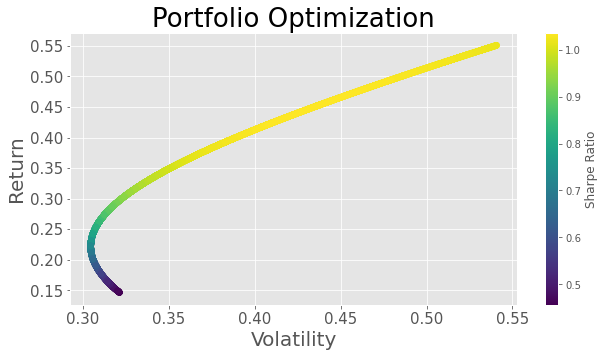

In [148]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

# Note first run for TSLA and BCA for 5 portfolios, and then 100 portfolios and then 10000 portfolios.
# Finally, make it 5 stocks and 20000 portfolios.


### Comparison with individual assets:

In [149]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019254
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021482
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [150]:
returns.mean() # daily returns of the two stocks.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [151]:
returns.std() # dailty standard deviation of the two stocks.

TSLA    0.034063
BAC     0.020238
dtype: float64

In [152]:
returns.mean() * 252 # annual returns of the two stocks.

TSLA    0.550826
BAC     0.146610
dtype: float64

In [153]:
returns.std() * 252 # annual standard deviations of the two stocks.

TSLA    8.583791
BAC     5.100023
dtype: float64

In [154]:
returns.std() * np.sqrt(252) # annual standard deviations of the two stocks. This one seems more reasonable. 
# check out this link: https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx

TSLA    0.540728
BAC     0.321271
dtype: float64